In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [40]:
df_=pd.read_excel("SonFloSon.xlsx")

In [41]:
df=df_.copy()

In [42]:
 df = df.drop(columns=['cluster'])

In [43]:
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
#pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.options.mode.chained_assignment = None 

In [44]:
columns_to_drop = df.columns[[1]]
df.drop(columns=columns_to_drop, inplace=True)

In [45]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [46]:
df.dropna(inplace=True)

In [47]:
df.head()

,ID,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,frequency_ratio_in_days,online_spending_ratio,offline_spending_ratio,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty,channel_loyalty_2,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn,purchase_frequency,Cluster,Cluster_Name
0,0,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37,23.80,0.85,0.15,1,95,5,187.87,214,order_num_total_ever_online,0,5.71,4.00,119,95,100,0.03,0.01,21.95,False,0,0.04,0,Loyal Spenders
1,1,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55,69.95,0.92,0.08,4,105,21,95.88,1574,order_num_total_ever_online,0,11.59,9.50,1469,508,105,0.01,0.00,26.86,False,0,0.01,1,High-Value Champions
2,10,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2,114.98,3.00,0.35,0.65,3,311,2,57.49,317,order_num_total_ever_online,0,0.53,1.00,6,311,317,0.17,0.17,0.73,False,0,0.33,3,Occasional Shoppers
3,100,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,334.96,564.88,[COCUK],10,899.84,37.50,0.63,0.37,1,90,10,89.98,465,order_num_total_ever_online,0,1.69,1.50,375,90,162,0.02,0.01,19.35,False,0,0.03,0,Loyal Spenders
4,1000,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,269.96,84.99,[ERKEK],5,354.95,95.00,0.24,0.76,1,306,5,70.99,781,order_num_total_ever_offline,1,0.31,0.25,475,448,306,0.00,0.01,2.27,False,0,0.01,3,Occasional Shoppers


In [48]:
df.isnull().sum()

ID                                   0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
order_num_total                      0
customer_value_total                 0
frequency_ratio_in_days              0
online_spending_ratio                0
offline_spending_ratio               0
num_interested_categories            0
recency                              0
frequency                            0
basket_size                          0
tenure                               0
channel_loyalty                      0
channel_loyalty_2                    0
value_ratio_online_offline           0
order_ratio_online_offlin

In [49]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler

In [50]:
columns_for_clustering = [
    "customer_value_total","loyalty_score",
    "num_interested_categories","frequency", 
    "tenure", "customer_lifetime","recency","basket_size","frequency_ratio_in_days"
]

In [51]:
at_risk_cluster = 0
df['Target'] = (df['Cluster'] == at_risk_cluster).astype(int)

In [52]:
#  data modelini hazırlama
X = df[columns_for_clustering]
y = df['Target']

In [53]:
# Verii standartizasyonu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [54]:
# Verileri eğitim ve test setlerine ayırdım.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# 
dt_params = {
    'max_depth': [3, 5, 7, 10],     #Karar ağacının maksimum derinliği
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)  #Hiperparametre kombinasyonlarını içerir.
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

In [56]:
# Random Forest modelinin hiperparametre ayarlaması
rf_params = {
    'n_estimators': [50, 100, 200],   # Her bir ağaçta kaç tane karar ağacı (decision tree) kullanılacağını belirtiyor.
    'max_depth': [3, 5, 7, 10],       # Her bir karar ağacının maksimum derinliğini belirtir.
    'min_samples_split': [2, 5, 10],  # Bir düğümü bölmek için gereken minimum örnek sayısını belirtir.
    'min_samples_leaf': [1, 2, 5]     # Bir yaprak düğümde bulunması gereken minimum örnek sayısı.
}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)  #5 katlı çapraz doğrulama
rf_grid.fit(X_train, y_train)               #modelin eğitilmesi
rf_best = rf_grid.best_estimator_            #en iyi performansa sahip hiperparametre kombinasyonunu seçer



In [57]:
#  modeli tanımladım
models = {
    "Decision Tree": dt_best,
    "Random Forest": rf_best
}

In [58]:
# Modeli eğitip değerlendirme 
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    precision = precision_score(y_test, y_pred)
    results[name] = {
        "Accuracy": accuracy,
     
        "Precision": precision
    }

In [59]:
df['Target'].value_counts()

Target
0    15282
1     4638
Name: count, dtype: int64

In [60]:
results

{'Decision Tree': {'Accuracy': 0.7828815261044176,
  'Precision': 0.5869565217391305},
 'Random Forest': {'Accuracy': 0.7971887550200804,
  'Precision': 0.7644787644787645}}

In [61]:

def plot_feature_importances(model, model_name):
    importances = model.feature_importances_
    features = columns_for_clustering
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances[indices], y=[features[i] for i in indices])
    plt.title(f'Feature Importances - {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()


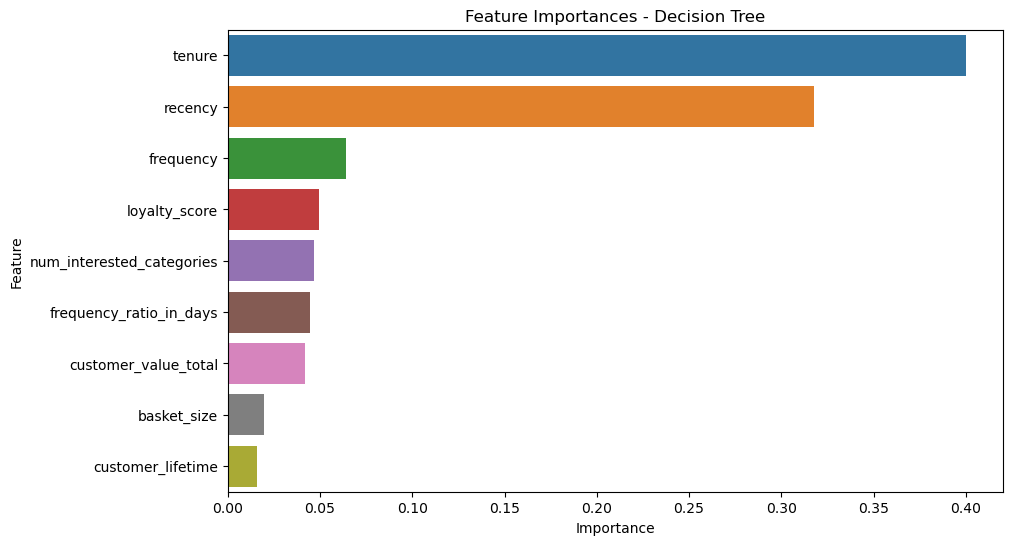

In [62]:
# Plot feature importances for the best Decision Tree model
plot_feature_importances(dt_best, "Decision Tree")

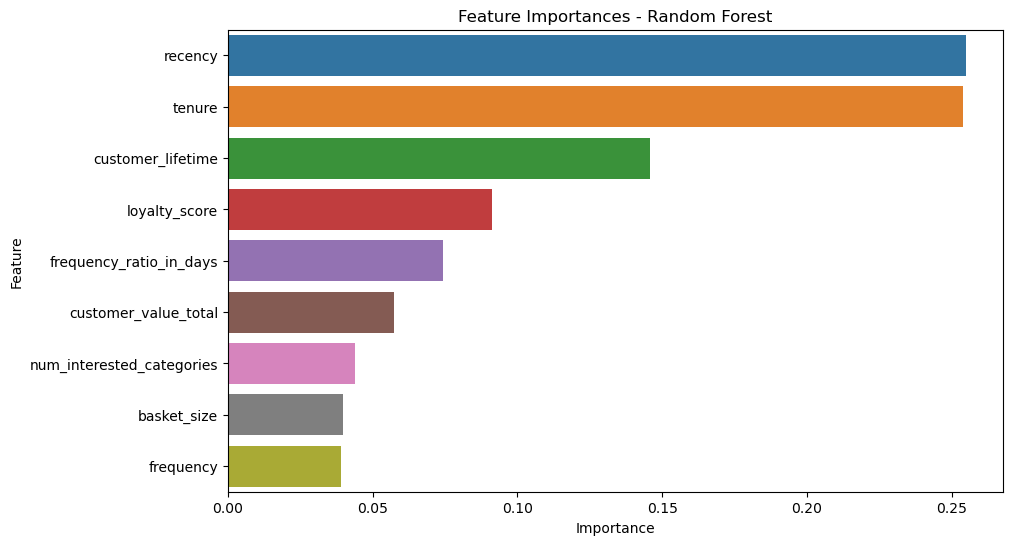

In [63]:
plot_feature_importances(rf_best, "Random Forest")

In [64]:
# En iyi modelin seçimi için bir değişken oluşturma
best_model_name = None
best_precision = 0

In [65]:
# En iyi modeli belirleme
if precision > best_precision:
        best_precision = precision
        best_model_name = name

##### Neden precision? Çünkü pozitif tahminlerin ne kadarının doğru olduğunu gösteriyor. Yani, At_Risk olarak sınıflandırılan müşterilerin gerçekten At_Risk olup olmadığını belirtiyoruz. Modelimizin amacı, At_Risk olarak tahmin edilen müşterilerin gerçekten At_Risk olduğundan emin olmak. (, yanlış alarm sayısını azaltmak istiyoruz), dolayısı ile precision yüksek olmalıdır

In [66]:
# En iyi model ile "At_Risk" olanları tahmin etme
best_model = models[best_model_name]
df['Prediction'] = best_model.predict(X)

In [67]:
df.head(30)

,ID,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,frequency_ratio_in_days,online_spending_ratio,offline_spending_ratio,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty,channel_loyalty_2,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn,purchase_frequency,Cluster,Cluster_Name,Target,Prediction
0,0,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37,23.80,0.85,0.15,1,95,5,187.87,214,order_num_total_ever_online,0,5.71,4.00,119,95,100,0.03,0.01,21.95,False,0,0.04,0,Loyal Spenders,1,0
1,1,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55,69.95,0.92,0.08,4,105,21,95.88,1574,order_num_total_ever_online,0,11.59,9.50,1469,508,105,0.01,0.00,26.86,False,0,0.01,1,High-Value Champions,0,0
2,10,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2,114.98,3.00,0.35,0.65,3,311,2,57.49,317,order_num_total_ever_online,0,0.53,1.00,6,311,317,0.17,0.17,0.73,False,0,0.33,3,Occasional Shoppers,0,0
3,100,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,334.96,564.88,[COCUK],10,899.84,37.50,0.63,0.37,1,90,10,89.98,465,order_num_total_ever_online,0,1.69,1.50,375,90,162,0.02,0.01,19.35,False,0,0.03,0,Loyal Spenders,1,0
4,1000,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,269.96,84.99,[ERKEK],5,354.95,95.00,0.24,0.76,1,306,5,70.99,781,order_num_total_ever_offline,1,0.31,0.25,475,448,306,0.00,0.01,2.27,False,0,0.01,3,Occasional Shoppers,0,0
5,10000,Android App,Android App,2019-08-07,2020-05-31,2020-05-31,2019-11-09,1,2,59.98,157.49,[AKTIFSPOR],3,217.47,99.33,0.72,0.28,1,366,3,72.49,664,order_num_total_ever_offline,1,2.63,0.50,298,570,366,0.00,0.01,0.98,False,1,0.01,3,Occasional Shoppers,0,0
6,10001,Android App,Offline,2020-06-23,2020-10-05,2020-08-26,2020-10-05,2,1,109.99,389.95,"[ERKEK, KADIN, AKTIFSPOR]",3,499.94,34.67,0.78,0.22,3,239,3,166.65,343,order_num_total_ever_online,0,3.55,2.00,104,239,279,0.02,0.01,4.37,False,0,0.03,0,Loyal Spenders,1,0
7,10002,Mobile,Mobile,2019-11-17,2021-01-05,2021-01-05,2019-11-17,2,1,192.96,267.47,[KADIN],3,460.43,138.33,0.58,0.42,1,147,3,153.48,562,order_num_total_ever_online,1,1.39,2.00,415,562,147,0.00,0.00,2.46,False,0,0.01,2,Moderate Shoppers,0,0
8,10003,Android App,Offline,2020-05-27,2020-12-10,2020-05-27,2020-12-10,1,1,311.23,89.99,[ERKEK],2,401.22,98.50,0.22,0.78,1,173,2,200.61,370,order_num_total_ever_online,0,0.29,1.00,197,173,370,0.01,0.01,2.17,False,0,0.01,0,Loyal Spenders,1,1
9,10004,Desktop,Desktop,2020-06-30,2020-07-07,2020-07-07,2020-06-30,2,1,130.49,379.96,"[ERKEK, KADIN, AKTIFSPOR]",3,510.45,2.33,0.74,0.26,3,329,3,170.15,336,order_num_total_ever_online,1,2.91,2.00,7,336,329,0.29,0.14,4.56,False,0,0.43,3,Occasional Shoppers,0,0


In [68]:
df.to_excel("C:/Users/User/Desktop/Flo_Last.xlsx", index=False)

In [69]:
# "At_Risk" olarak tespit edilenlerin ID'lerini listeleme
at_risk_ids = df[df['Prediction'] == 1]['ID']
print("Occasional Spenders olarak tespit edilenlerin ID'leri:")
print(at_risk_ids.tolist())

Occasional Spenders olarak tespit edilenlerin ID'leri:
[10003, 10020, 10030, 10033, 10052, 10059, 10060, 10063, 1011, 10114, 10119, 1012, 10128, 10141, 10145, 10156, 10175, 10178, 10179, 10189, 10191, 10214, 10232, 10248, 10300, 10317, 10326, 10336, 10344, 1036, 10371, 10380, 10384, 10413, 10417, 10429, 10445, 10455, 10469, 10504, 10514, 10517, 10538, 10552, 10556, 10557, 10580, 10589, 10592, 10595, 10624, 10631, 10633, 10644, 10666, 10674, 1068, 1070, 10708, 10710, 10748, 10749, 10753, 10764, 10769, 10786, 10794, 1082, 10828, 10863, 10872, 10882, 10897, 10899, 1090, 10909, 1091, 10910, 10920, 10925, 10933, 10947, 1096, 10961, 10964, 10987, 10990, 11003, 11014, 11015, 1102, 11022, 11029, 11061, 11082, 11083, 11099, 11102, 11120, 11147, 11149, 11159, 11179, 1118, 11186, 1120, 11202, 11212, 11233, 11241, 11242, 1126, 11277, 11328, 11330, 1136, 11361, 114, 11400, 11407, 1141, 11428, 11455, 11463, 11479, 11510, 11530, 11539, 11546, 11548, 11555, 11566, 11613, 11617, 1164, 11653, 11658, 116

In [70]:
df.head()

,ID,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,order_num_total,customer_value_total,frequency_ratio_in_days,online_spending_ratio,offline_spending_ratio,num_interested_categories,recency,frequency,basket_size,tenure,channel_loyalty,channel_loyalty_2,value_ratio_online_offline,order_ratio_online_offline,customer_lifetime,offline_last_order_recency,online_last_order_recency,online_order_frequency,offline_order_frequency,loyalty_score,is_active_customer,churn,purchase_frequency,Cluster,Cluster_Name,Target,Prediction
0,0,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4,1,139.99,799.38,[KADIN],5,939.37,23.80,0.85,0.15,1,95,5,187.87,214,order_num_total_ever_online,0,5.71,4.00,119,95,100,0.03,0.01,21.95,False,0,0.04,0,Loyal Spenders,1,0
1,1,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19,2,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21,2013.55,69.95,0.92,0.08,4,105,21,95.88,1574,order_num_total_ever_online,0,11.59,9.50,1469,508,105,0.01,0.00,26.86,False,0,0.01,1,High-Value Champions,0,0
2,10,Ios App,Offline,2020-07-19,2020-07-25,2020-07-19,2020-07-25,1,1,74.99,39.99,"[AKTIFCOCUK, COCUK, KADIN]",2,114.98,3.00,0.35,0.65,3,311,2,57.49,317,order_num_total_ever_online,0,0.53,1.00,6,311,317,0.17,0.17,0.73,False,0,0.33,3,Occasional Shoppers,0,0
3,100,Android App,Offline,2020-02-22,2021-03-03,2020-12-21,2021-03-03,6,4,334.96,564.88,[COCUK],10,899.84,37.50,0.63,0.37,1,90,10,89.98,465,order_num_total_ever_online,0,1.69,1.50,375,90,162,0.02,0.01,19.35,False,0,0.03,0,Loyal Spenders,1,0
4,1000,Android App,Android App,2019-04-12,2020-07-30,2020-07-30,2020-03-10,1,4,269.96,84.99,[ERKEK],5,354.95,95.00,0.24,0.76,1,306,5,70.99,781,order_num_total_ever_offline,1,0.31,0.25,475,448,306,0.00,0.01,2.27,False,0,0.01,3,Occasional Shoppers,0,0


In [63]:
import joblib

In [64]:
# Modeli kaydet
model_filename = 'random_forest_model.joblib'
joblib.dump(rf_best, model_filename)
print(f"Model '{model_filename}' dosyasına kaydedildi.")

Model 'random_forest_model.joblib' dosyasına kaydedildi.


In [65]:
# Kaydedilmiş modeli yükle
# loaded_model = joblib.load(model_filename)